In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def f(dev, a=30.19, b=-0.01744, c=39.47, d=0.0006516):
    return a * np.exp(b * dev) + c * np.exp(d * dev)

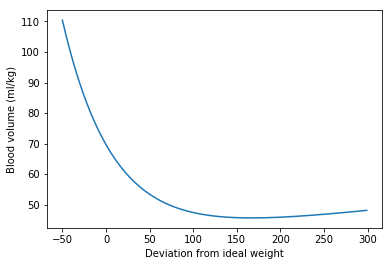

In [7]:
dev = np.arange(-50, 300)
plt.plot(dev, f(dev))
plt.xlabel('Deviation from ideal weight')
plt.ylabel('Blood volume (ml/kg)')
plt.show()

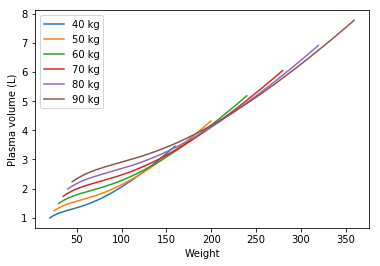

In [18]:
dev = np.arange(-50, 300)
hem = 0.45
for weight in (40, 50, 60, 70, 80, 90):
    plt.plot(weight * (1 + dev/100), hem * weight * (1 + dev/100) * f(dev) / 1000, label=f'{weight} kg')
plt.xlabel('Weight')
plt.ylabel('Plasma volume (L)')
plt.legend()
plt.show()

In [24]:
def g(Dev, A=1e10, h=1.6, ν=0.5, n=4, K=1, sex='male'):
    δ = Dev / 100
    if sex == 'male':
        a0, a1, a2 = 176.3, 220.6, 93.5
    elif sex == 'female':
        a0, a1, a2 = 145.8, 182.7, 79.55
    # height in m
    w_ideal = a0 + a1 * h + a2 * h**2
    return A * w_ideal ** ν * (1 + δ)**(n - 1) / ((K / w_ideal)**n + (w_ideal * (1 + δ))**n)

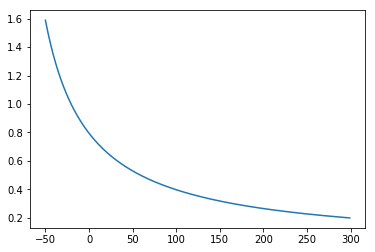

In [25]:
Dev = np.arange(-50, 300)
plt.plot(Dev, g(Dev))
plt.show()

In [35]:
#data = pd.read_csv('blood_volume_data.csv')
male_data = pd.read_csv('patient_data_male.csv')
female_data = pd.read_csv('patient_data_female.csv')

In [36]:
male_data['male'] = True
female_data['male'] = False
data = pd.concat([male_data, female_data])

In [53]:
def g(Dev, A=1e10, ν=0.5, n=4, K=1, male=data['male']):
    δ = Dev / 100.0
    result = np.zeros(len(Dev))
    w_ideal = np.zeros(len(Dev))
    
    #female = ~male
    #w_ideal[male] = 176.3 + 220.6 * h + 93.5 * h**2
    #w_ideal[female] = 145.8 + 182.7 * h + 79.55 * h**2
    #w_ideal = 176.3 + 220.6 * h + 93.5 * h**2
    
    # height in m
    partial = (np.exp(ν * np.log(w_ideal)) * np.exp((n - 1) * np.log(1 + δ)) /
               (np.exp(n * (np.log(K) - np.log(w_ideal))) + np.exp(n * (np.log(w_ideal) + np.log(1 + δ)))))
    return A * partial

In [134]:
def g(Dev, A=9e3, n=4, K=40):
    return A * ((100 + Dev)**(n-1) / ((100 + Dev)**n + (K)**n))

In [135]:
data

,div,bv,male
0,-25.344447,103.678010,True
1,-33.239472,102.335905,True
2,-31.250520,100.595333,True
3,-25.096225,99.764787,True
4,-39.365127,99.253387,True
5,-31.460554,99.291137,True
6,-31.450052,97.856347,True
7,-25.072358,96.503900,True
8,-36.032279,93.903146,True
9,-32.738575,93.900759,True


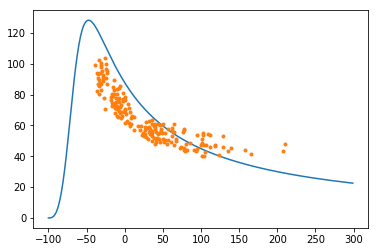

In [136]:
Dev = np.arange(-100, 300)
plt.plot(Dev, g(Dev))
plt.plot(data['div'], data['bv'], '.')
plt.show()

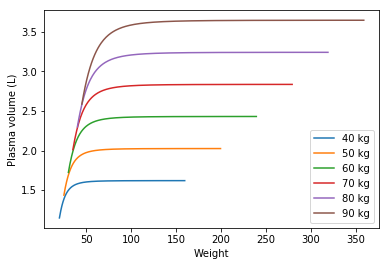

In [137]:
dev = np.arange(-50, 300)
hem = 0.45
for weight in (40, 50, 60, 70, 80, 90):
    plt.plot(weight * (1 + dev/100), hem * weight * (1 + dev/100) * g(dev) / 1000, label=f'{weight} kg')
plt.xlabel('Weight')
plt.ylabel('Plasma volume (L)')
plt.legend()
plt.show()

In [138]:
from scipy.optimize import curve_fit

In [139]:
?curve_fit

In [140]:
fit = curve_fit(g, data['div'], data['bv'], p0=[9e3, 4, 30],
                bounds=([0, 0, 0], [np.inf, 10, 100]), maxfev=3000)

In [141]:
params, cov = fit

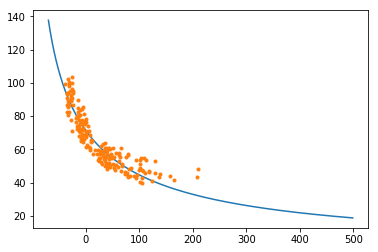

In [143]:
Dev = np.arange(-70, 500)
plt.plot(Dev, g(Dev, *params))
plt.plot(data['div'], data['bv'], '.')
plt.show()

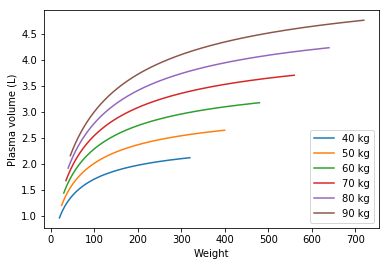

In [133]:
dev = np.arange(-50, 700)
hem = 0.45
for weight in (40, 50, 60, 70, 80, 90):
    plt.plot(weight * (1 + dev/100), hem * weight * (1 + dev/100) * g(dev, *params) / 1000, label=f'{weight} kg')
plt.xlabel('Weight')
plt.ylabel('Plasma volume (L)')
plt.legend()
plt.show()

In [144]:
params

array([1.42634330e+04, 7.45964264e-01, 1.00000000e+02])

In [146]:
cov

array([[ 3.02293281e+07, -1.69312413e+03,  5.77613025e+05],
       [-1.69312413e+03,  9.67352305e-02, -3.23702686e+01],
       [ 5.77613025e+05, -3.23702686e+01,  1.10403739e+04]])